In [11]:
import os

path = os.getcwd()

print("Currently at", path)


Currently at C:\Users\Sarthak\titanic


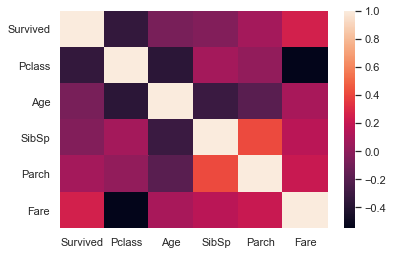

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

sns.set()

df = pd.read_csv(path+"/data/train.csv")
df.set_index("PassengerId", inplace=True)

int_columns = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]

df[int_columns] = scaler.fit_transform(df[int_columns])

# Heat Map
bx = sns.heatmap(df.corr())


In [13]:
import numpy as np

print(df.shape)

# Data Cleaning
dfRemoved = df.dropna(axis='columns')
dfRemoved = dfRemoved.drop(columns=['Ticket', 'Name'])

print(df.columns)
print(dfRemoved.columns)


(891, 11)
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [14]:

# print(df.dtypes)
# Data Processing

dfRemoved = pd.get_dummies(dfRemoved, columns=['Sex'])


In [15]:
print(dfRemoved.shape)

(891, 7)


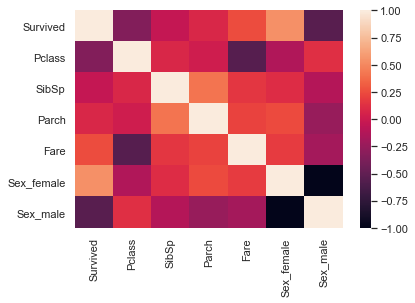

In [16]:
sns.heatmap(dfRemoved.corr())

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
X= dfRemoved.drop('Survived', axis=1).values
y=dfRemoved['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
